# Problems
***

This Jupyter Notebook contains the assessment for the module of Applied Statistics taught by Ian McLoughlin. This assessment is composed by 4 problems which aim to demonstrate the skills acquired within this course.

In [1]:
# Install all required libraries

"""Numerical structures and operations.
https://numpy.org/doc/stable/reference/index.html#reference"""
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

"""Plotting.
https://matplotlib.org/stable/contents.html"""
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

# From Python Standard Library:

"""Mathematical functions
https://docs.python.org/3/library/math.html"""
import math

"""Permutations and combinations 
https://docs.python.org/3/library/itertools.html"""
import itertools

"""Random selections
https://docs.python.org/3/library/random.html"""
import random



# import sympy as sp
# from nose import with_setup, tools
# from sklearn import datasets
# from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
# from qiskit.visualization import plot_histogram
# import yfinance as yf

## Problem 1: Extending the Lady Tasting Tea


The first problem is an extension of the Lady Tasting Tea experiment conducted by Ronald Fisher and reported in his book The Design of Experiment in 1935.
Before explaining the extension of this experiment, here it is a brief introduction of the Lady Tasting Tea experiment conducted by Fisher:
The Lady Tasting Tea experiment, designed by Fisher, tested a woman’s claim that she could tell whether milk or tea was poured first into a cup. To evaluate this, Fisher used a hypothesis testing approach: under the null hypothesis, her guesses would be random, while the alternative assumed real ability. She was given eight cups (four of each type) in random order to identify. Fisher calculated the probability of correctly identifying all by chance as 1 in 70, showing that such an outcome would provide strong evidence against the null hypothesis. This experiment became a foundational example of statistical hypothesis testing and experimental design. The following Wikipedia link was used to obtain further details of the Lady Tasting Tea experiment conducted by Fisher: [Lady Tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea).

While in the original Lady Tasting Tea experiment Fisher used 8 cups: 4 tea-first and 4 mil-first, in this extension of the Lady Tasting Tea experiment it is being adopted 12 cups: 8 tea-first and 4 milk-first. It follows the same claim where a participant says they can tell which was poured first. The experiment is simulated using numpy to randomly shuffling the cups a number of times and calculate the probability of the participat correctly identifying all cups by chance. 
Furthermore, a comparison is made between the original Lady Tasting tea experiment and this extension.
The aim of this extension is not only to explore how changing the experimental design—from 8 cups (4 of each type) to 12 cups (8 tea-first and 4 milk-first)—affects the probability of correctly identifying all cups by chance, but also to demonstrate how statistical simulation can be implemented using Python. By employing tools such as NumPy to randomly shuffle cup arrangements and compute probabilities across multiple trials, this extension illustrates how programming can be used to replicate and analyse classical experiments. Through this process, it becomes possible to visualise and quantify how modifications in sample size or cup proportions influence the statistical evidence against the null hypothesis.


### Cups of Tea

In order to complete this in python, we first define the variables of each group in order to keep track of the tea preparation options as well as the group containing all cups.

In [2]:
# Number of cups of tea in total
all_cups = 12

# Number of cups of tea with milk added first
milk_first_cups = 4

# Number of cups of tea with tea added first
tea_first_cups = 8

### Using the function math.comb(n, k)

Now we use math.comb(n, k), which is a built-in Python function (introduced in Python 3.8) that comes from the math module. The [Python Standard Library](https://docs.python.org/3/library/math.html#math.comb) documentation regarding `math.comb(n, k)` was consulted to develop the work on this section. 

This function calculates how many ways to choose k elements from a set of n elements. Here, order of the elements does not matter. Each element is only selected once.

Behind the scenes, the function uses this formula:

$$
\frac{n!}{k! \times (n - k)!}
$$

In [3]:
# Number of ways to choose 4 cups from 12
ways = math.comb(all_cups, milk_first_cups)

# Display the number of combinations
ways

495

#### Let’s break it down:
- **n! (n factorial)** means multiplying all the numbers from `1` to `n`.  
  For example, n in our case is `all_cups`, so for n! we have (12 x 11 x 10 x ... x 1).   
  To do this in Python we will use math.factorial() function which generates the product of a positive integer and all the integers below it. The use this function, I consulted [math.factorial(n)](https://docs.python.org/3/library/math.html#math.factorial) in Python Standard Library.

In [4]:
# n!
n_fact= math.factorial(all_cups)

# Display n!
n_fact

479001600

- **k!** means multiplying all the numbers from `1` to `k`.
  k in our example is milk_first_cups, so for k! we have (4 x 3 x 2 x 1).
  Here we use math.factorial again which gives us:

In [5]:
# k!
k_fact = math.factorial(milk_first_cups)

# Display k!
k_fact

24

- **(n-k)!** means multiplying all the numbers from `1` to the difference between `n` and `k`:

In [6]:
# (n-k)!
n_k_fact = math.factorial(all_cups - milk_first_cups)

# Display (n-k)!
n_k_fact

40320

- Replacing the values in the formula we have:

  - n! = 479001600 
  - k! = 24 
  - (n-k)! = 40320 

-  So the formula works by dividing `n!` by the product of `k!` and `(n - k)!` to find the total number of unique combinations.

In [7]:
# Total combinations using the formula n! / (k! * (n-k)!)
comb = n_fact // (k_fact * n_k_fact)

# Display total combinations
comb

495

In [8]:
# Confirming both methods give the same result
ways == comb

True

### Ordering of Results

Let's start by applying labels to each one of the cups:

In [9]:
# The cup labels
labels = list (range(all_cups))

# Show labels
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Now let's demonstrate the different ways of selecting milk_first_cups out of all_cups cups of tea. For this step we used [itertools.combination](https://docs.python.org/3/library/itertools.html#itertools.combinations) function from Python standard library.

In [10]:
# Different ways of selecting milk_first_cups out of all_cups cups of tea.
comb_cups = list(itertools.combinations(labels, milk_first_cups))

# Show.
comb_cups[:10]  # Show only the first 10 combinations

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4)]

In [11]:
# Number of combinations
len(comb_cups)

495

In [12]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort the selected labels for better readability
labels_milk.sort()

# Show.
labels_milk

[0, 6, 7, 9]

In [14]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 6, 7, 9}

In [16]:
# Calculate the overlaps between each element of comb_cups and labels_milk.

overlaps = []

# Loop through the combinations.
for i in comb_cups:
  # Turn i into a set.
  s1 = set(i)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(i, len(overlap), overlap)
  # Append overlap to overlaps.
  overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {0}
(0, 1, 2, 4) 1 {0}
(0, 1, 2, 5) 1 {0}
(0, 1, 2, 6) 2 {0, 6}
(0, 1, 2, 7) 2 {0, 7}
(0, 1, 2, 8) 1 {0}
(0, 1, 2, 9) 2 {0, 9}
(0, 1, 2, 10) 1 {0}
(0, 1, 2, 11) 1 {0}
(0, 1, 3, 4) 1 {0}
(0, 1, 3, 5) 1 {0}
(0, 1, 3, 6) 2 {0, 6}
(0, 1, 3, 7) 2 {0, 7}
(0, 1, 3, 8) 1 {0}
(0, 1, 3, 9) 2 {0, 9}
(0, 1, 3, 10) 1 {0}
(0, 1, 3, 11) 1 {0}
(0, 1, 4, 5) 1 {0}
(0, 1, 4, 6) 2 {0, 6}
(0, 1, 4, 7) 2 {0, 7}
(0, 1, 4, 8) 1 {0}
(0, 1, 4, 9) 2 {0, 9}
(0, 1, 4, 10) 1 {0}
(0, 1, 4, 11) 1 {0}
(0, 1, 5, 6) 2 {0, 6}
(0, 1, 5, 7) 2 {0, 7}
(0, 1, 5, 8) 1 {0}
(0, 1, 5, 9) 2 {0, 9}
(0, 1, 5, 10) 1 {0}
(0, 1, 5, 11) 1 {0}
(0, 1, 6, 7) 3 {0, 6, 7}
(0, 1, 6, 8) 2 {0, 6}
(0, 1, 6, 9) 3 {0, 9, 6}
(0, 1, 6, 10) 2 {0, 6}
(0, 1, 6, 11) 2 {0, 6}
(0, 1, 7, 8) 2 {0, 7}
(0, 1, 7, 9) 3 {0, 9, 7}
(0, 1, 7, 10) 2 {0, 7}
(0, 1, 7, 11) 2 {0, 7}
(0, 1, 8, 9) 2 {0, 9}
(0, 1, 8, 10) 1 {0}
(0, 1, 8, 11) 1 {0}
(0, 1, 9, 10) 2 {0, 9}
(0, 1, 9, 11) 2 {0, 9}
(0, 1, 10, 11) 1 {0}
(0, 2, 3, 4) 1 {0}
(0, 2, 3, 5) 1 {0}
(0, 2, 3

In [17]:
# Show the overlaps.
print(overlaps)

[1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 

In [ ]:
# Count the number of times each overlap occurs.
counts = np.unique(overlaps, return_counts=True)

# Show.
counts


(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

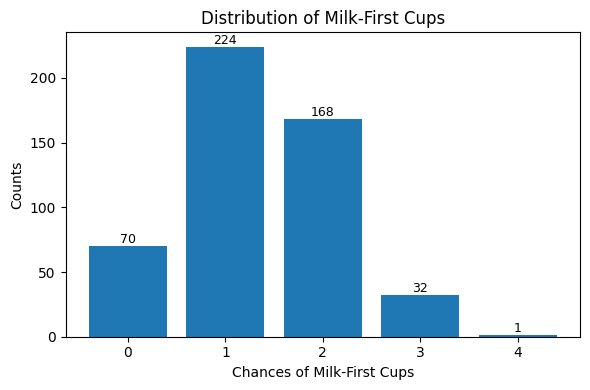

In [24]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.bar(counts[0], counts[1])

# Add labels on top of bars.
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height,                             # y position
        f'{height:.0f}',                    # label text
        ha='center', va='bottom', fontsize=9
    )

ax.set_xlabel("Chances of Milk-First Cups")
ax.set_ylabel("Counts")
ax.set_title("Distribution of Milk-First Cups")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Problem 2: Normal Distribution

## Problem 3: t-Tests

## Problem 4: ANOVA

***
# End